In [67]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns

In [68]:
import os 
os.listdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts')

['.DS_Store',
 '.idea',
 '.ipynb_checkpoints',
 'all.csv',
 'analysis.R',
 'data',
 'data.ipynb',
 'data.py',
 'data2.py',
 'ec_data_compression.py',
 'ec_evaluation.py',
 'ec_summary.py',
 'figures',
 'igh.csv',
 'IGH_Analysis.ipynb',
 'igh_cont.csv',
 'plots.ipynb',
 'RSR_Analysis.ipynb',
 'rsr_for_r.csv',
 't1.csv',
 'T1_Analysis.ipynb',
 't1_cat.csv',
 't1_for_r.csv',
 't3.csv',
 'tra.csv',
 'TRA_Analysis.ipynb',
 'tra_cont.csv']

In [69]:
os.chdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts/data')
data = pd.read_csv('igh_from_master.csv')
data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Tool,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency
0,0,coral_rep.seq_sim_rl_50_cov_2_1_18.corrected.f...,run.coral.sh,18,0,3,5,0,0,8,...,Coral,2,50L,0.000000,0.000000,-25.600000,0.641292,IGH,0.050750,0.000000
1,1,coral_rep.seq_sim_rl_50_cov_4_1_18.corrected.f...,run.coral.sh,18,0,7,9,0,0,0,...,Coral,4,50L,0.000000,NaN,0.000000,0.980000,IGH,0.000000,NaN
2,2,fiona_rep.seq_sim_rl_50_cov_2_1_405000.correct...,run.fiona.sh,18,0,3,5,0,0,0,...,Fiona,2,50L,0.000000,NaN,0.000000,0.977500,IGH,0.000000,NaN
3,3,bless_rep.seq_sim_rl_75_cov_1_1_18.corrected.f...,run.bless.sh,18,5969,2629,686,15,1005,74,...,Bless,1,75L,0.903882,0.721246,0.554542,0.932924,IGH,0.061053,0.036823
4,4,bfc_rep.seq_sim_rl_100_cov_1_1_18.corrected.fa...,run.bfc.sh,18,167,942,5979,1,91,0,...,Bfc,1,100L,0.050105,0.751832,0.033566,0.980702,IGH,0.000000,NaN


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


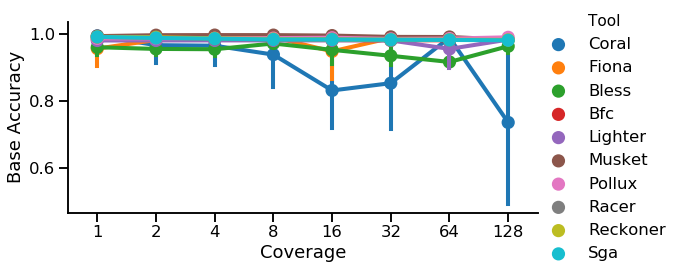

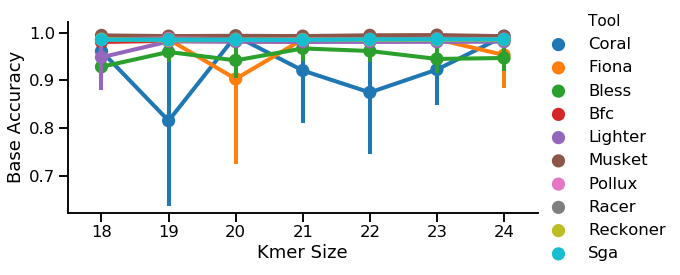

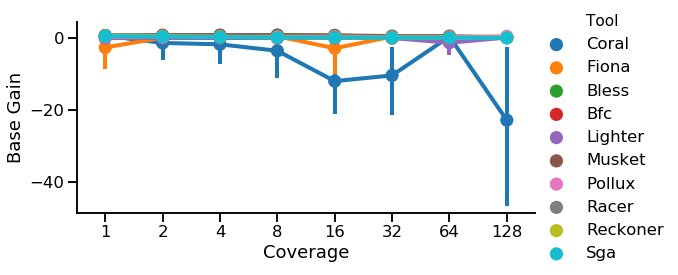

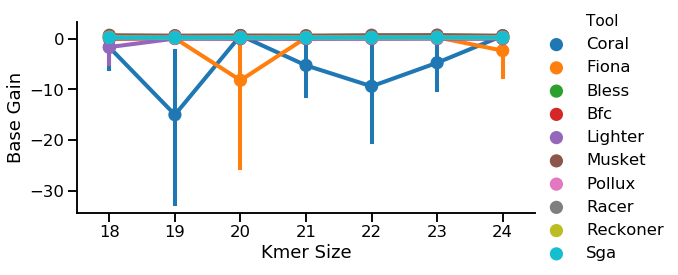

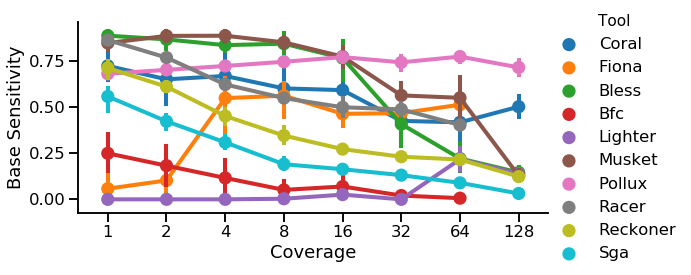

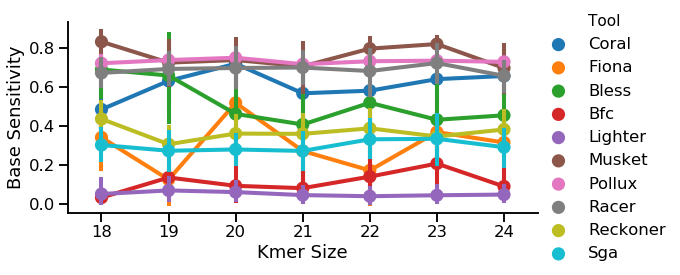

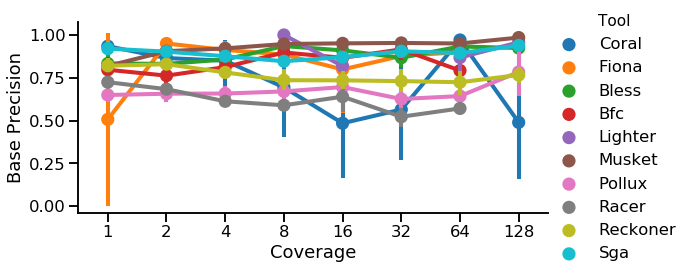

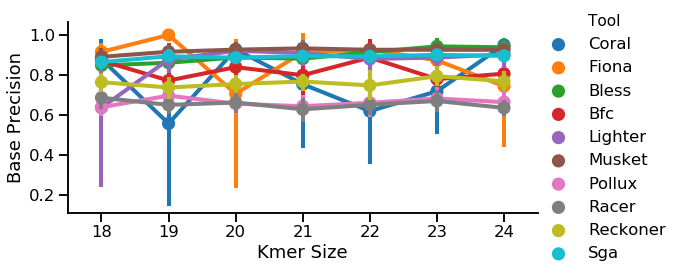

In [72]:
for i in ["Base Accuracy", "Base Gain", "Base Sensitivity", "Base Precision"]:
    sns.set_context('talk')
    g = sns.catplot(x="Coverage", y=i,
                 hue="Tool", kind='point', height=4, aspect=2,
                 data=data)
    g = sns.catplot(x="Kmer Size", y=i,
                 hue="Tool", kind='point', height=4, aspect=2,
                 data=data)

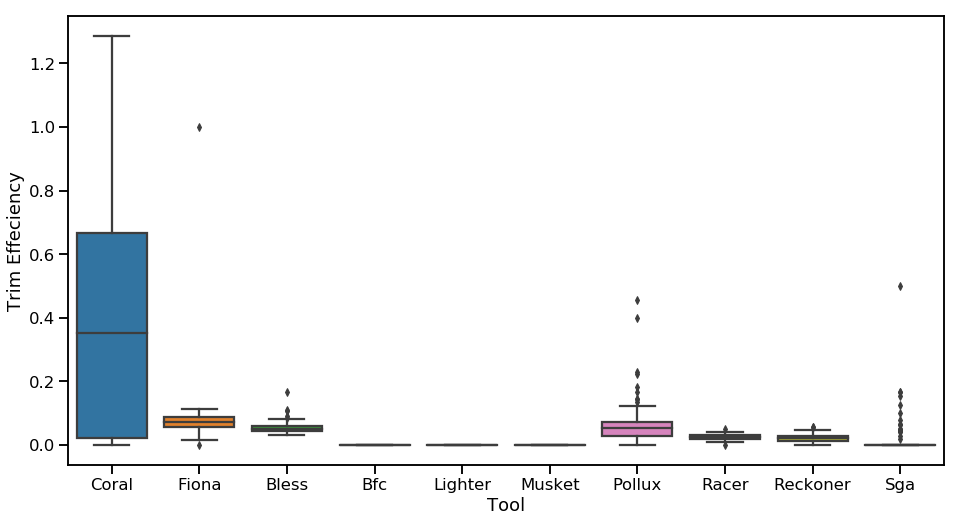

In [37]:
sns.set_context('talk')
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_context('talk')
sns.boxplot(ax=ax, y="Trim Effeciency", x="Tool",
             data=data)

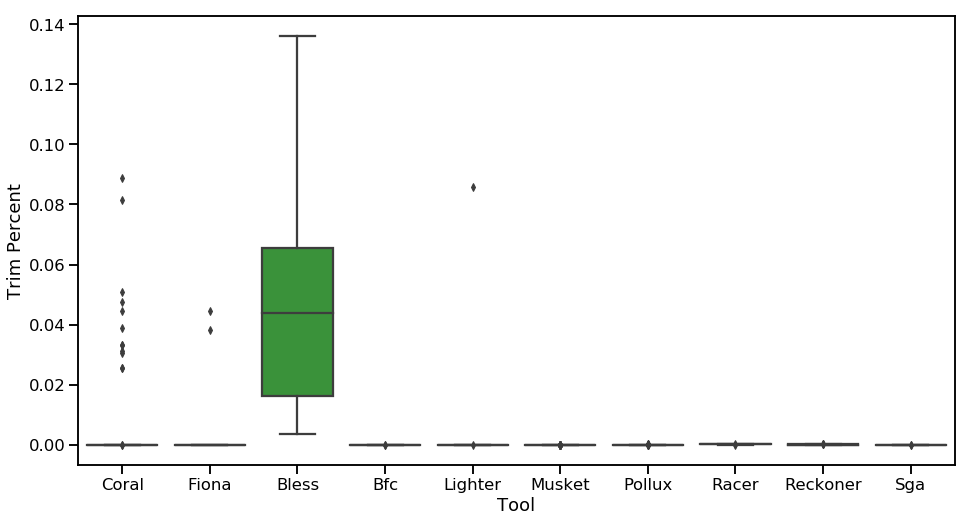

In [71]:
sns.set_context('talk')
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_context('talk')
sns.boxplot(ax=ax, y="Trim Percent", x="Tool",
             data=data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


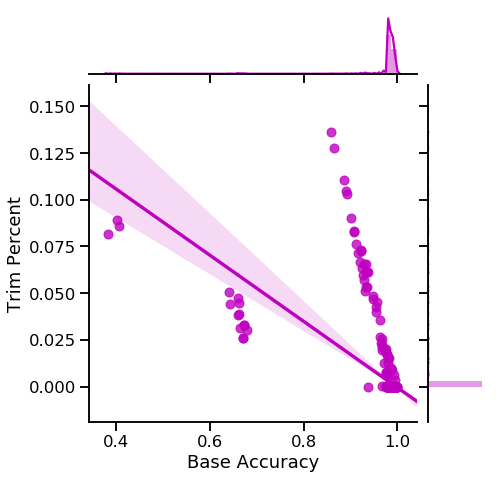

In [43]:
g = sns.jointplot("Base Accuracy", "Trim Percent",  data=data, kind="reg",
                  color="m", height=7)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


OverflowError: cannot convert float infinity to integer

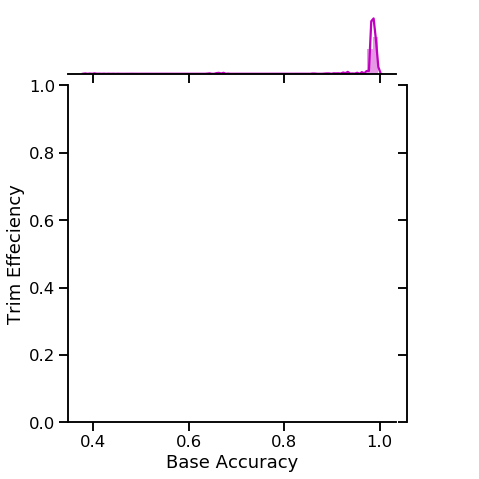

In [66]:
g = sns.jointplot("Base Accuracy", "Trim Effeciency",  data=data, kind="reg",
                  color="m", height=7)

ValueError: Unknown format code 'd' for object of type 'float'

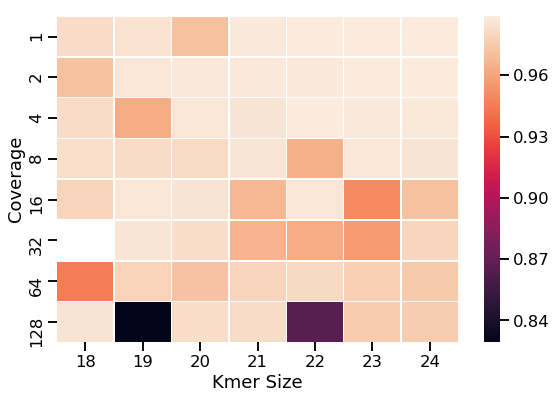

In [65]:

table = data.groupby(['Coverage', 'Kmer Size']).mean().reset_index()

new_table = table[['Coverage', 'Kmer Size', 'Base Accuracy']].copy()

new_table.head()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(new_table.pivot("Coverage", "Kmer Size", "Base Accuracy"), annot=True, fmt="d", linewidths=.5, ax=ax)